
# Unsupervised Learning
## Human Activity identification
Problem Statement

With the advancement in IOT, sensors analytics have played a huge role in day-to-day activities. Sudden spike in the availability and usage of smart watches is a great example for this. Application of sensors analytics living beings to track their actions and vital signs has huge set of problem pool, namely – Calorie tracker, early warning for life threatening diseases, protection of endangered species, improve sports person’s abilities etc.
The current problem can be considered as the base for all the above mentions applications of sensor analytics on living things. Certain experiments were carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz were captured. The experiments have been video-recorded to label the data manually. (http://www.youtube.com/watch?v=XOEN9W05_4A)
Tasks to do: -
1.	Prepare the data with reasonable number of features (should use any dimension reduction technique with proper explanation).
2.	Combine all the walking activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS) as single activity along with the other activities (SITTING, STANDING & LAYING) and build a 4-cluster model and profile it.
3.	Build a 6-cluster model for all the activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) and profile it.
4.	Provide the cluster for each observation from Task 2 and Task 3.
Number of features to be used is up to you and for every clustering technique (in case of multiple) used, the features used can differ. But you have to provide reasons for using those features in a particular model.
Profiling a clustering model is nothing but extensive documentation about the process and the results. You should create a document with following information for each model: -
1.	Columns used and no. of models with explanation
2.	Parameters used and valid reasons


# Data Description
As mentioned above, this is an experimental data and it has 561 features.
The dataset includes the following files: -
1.	'X_experiment.txt': Experiment set with all the feature values.
2.	'subject.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30.
3.	'features.txt': List of all features.


Feature information: -
The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 
Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also, the magnitude of these three-dimensional signals was calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 
Finally, a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 
These signals were used to estimate variables of the feature vector for each pattern ('-XYZ' is used to denote 3-axial signals in the X, Y and Z directions):
1.	tBodyAcc-XYZ
2.	tGravityAcc-XYZ
3.	tBodyAccJerk-XYZ
4.	tBodyGyro-XYZ
5.	tBodyGyroJerk-XYZ
6.	tBodyAccMag
7.	tGravityAccMag
8.	tBodyAccJerkMag
9.	tBodyGyroMag
10.	tBodyGyroJerkMag
11.	fBodyAcc-XYZ
12.	fBodyAccJerk-XYZ
13.	fBodyGyro-XYZ
14.	fBodyAccMag
15.	fBodyAccJerkMag
16.	fBodyGyroMag
17.	fBodyGyroJerkMag
The set of variables that were estimated from these signals are: 
1.	mean(): Mean value
2.	std(): Standard deviation
3.	mad(): Median absolute deviation 
4.	max(): Largest value in array
5.	min(): Smallest value in array
6.	sma(): Signal magnitude area
7.	energy(): Energy measure. Sum of the squares divided by the number of values. 
8.	iqr(): Interquartile range 
9.	entropy(): Signal entropy
10.	arCoeff(): Autorregresion coefficients with Burg order equal to 4
11.	correlation(): correlation coefficient between two signals
12.	maxInds(): index of the frequency component with largest magnitude
13.	meanFreq(): Weighted average of the frequency components to obtain a mean frequency
14.	skewness(): skewness of the frequency domain signal 
15.	kurtosis(): kurtosis of the frequency domain signal 
16.	bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
17.	angle(): Angle between to vectors.
Additional vectors obtained by averaging the signals in a signal window sample. These are used on the angle() variable:
1.	gravityMean
2.	tBodyAccMean
3.	tBodyAccJerkMean
4.	tBodyGyroMean
5.	tBodyGyroJerkMean
Points to Note:
1.	Features are normalized and bounded within [-1,1].
2.	The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/seg2).
3.	The gyroscope units are rad/seg.


## LOADING THE PRE-REQUISITES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA

C:\Users\shashank.upadhyay\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##  DATA-PREPROCESSING

In [2]:
features = []
with open("D:/DS/Human Activity Recognition Using Smartphones/DATA/dataset/features.txt") as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))
print("No. of unique features:{}".format(len(set(features))))

No of Features: 561
No. of unique features:477


In [3]:
re=[]
for i , f in enumerate(features):
    for j in range(i+1 , len(features)):
        if features[i]==features[j] and features[i] not in re:
            re.append(features[i])

In [4]:
for i , f in enumerate(features):
    features[i] = ''.join(e for e in f if e not in ['(',')' , '-' , ','])

In [5]:
data = pd.read_csv("D:/DS/Human Activity Recognition Using Smartphones/DATA/dataset/X_experiment.txt" , delim_whitespace=True ,header=None)
data.columns = features
data['subject'] = pd.read_csv("D:/DS/Human Activity Recognition Using Smartphones/DATA/dataset/subject.txt", header=None , squeeze=True)

In [6]:
print("The number of missing values in  Data:" , data.isnull().values.sum())
print("The number of duplicate values in  Data:" , data.duplicated().values.sum())

The number of missing values in  Data: 0
The number of duplicate values in  Data: 0


In [7]:

data.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [8]:
data.shape

(7352, 562)

In [9]:
# As mentioned in the problem statement, the data is scaled between -1 and 1
# there are no missing values

#let's check the distribution of the data across the subjects

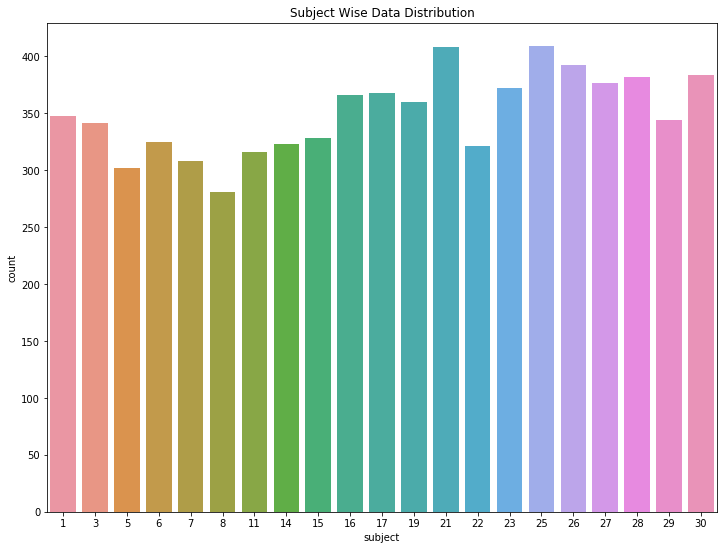

In [10]:
plt.figure(figsize=(12,9))
plt.title('Subject Wise Data Distribution')
sns.countplot(x='subject' , data=data )
plt.show()

In [11]:
# the distribution is pretty balanced across different subjects 

In [48]:
#subject is the ID variable, hence dropping from the main set of features
ID=data[['subject']]
data_f=data[data.columns.difference(['subject'])]

In [49]:
data_f.shape

(7352, 561)

In [50]:
#Handling Outliers -
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

data_f=data_f.apply(outlier_treatment)

In [22]:
# pd.set_option('display.max_rows',600)

# Assumptions of k-Means

1) there are k clusters( the biggest assumption)¶

2) SSE is the right objective to minimize.
wait what's SSE?
k-means is a good quantization algorithm ,the objective of k-means - minimizing the "squared error" - is a reasonable choice if you replace every object by its nearest centroid, this quantization is probably quite similar to the linear regression example. Linear regression finds the best linear model. And k-means finds (sometimes) the best reduction to k values of a multidimensional data set. Where "best" is the least squared error.

3) all clusters have the same SSE.

4) all variables have the same importance for every clusters.

Elbow method---
To prevent the algorithm returning sub-optimal clustering, the kmeans method includes the n_init and method parameters
1) The "n_init" just reruns the algorithm with n different initialisations and returns the best output (measured by the within cluster sum of squares).

2) By setting the init to ‘kmeans++’ (the default), the initial centres are smartly selected (i.e. better than random). This has the additional benefit of decreasing runtime (less steps to reach convergence).

3) tol - Relative tolerance with regards to inertia to declare convergence

4) max_iter --Maximum number of iterations of the k-means algorithm for a single run.

5) random_state --Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.

6) algorithm -- K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient by using the triangle inequality, but currently doesn’t support sparse data. “auto” chooses “elkan” for dense data and “full” for sparse data.

read more about it --https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

"E-Step" :"Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.

"M-Step" :"Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

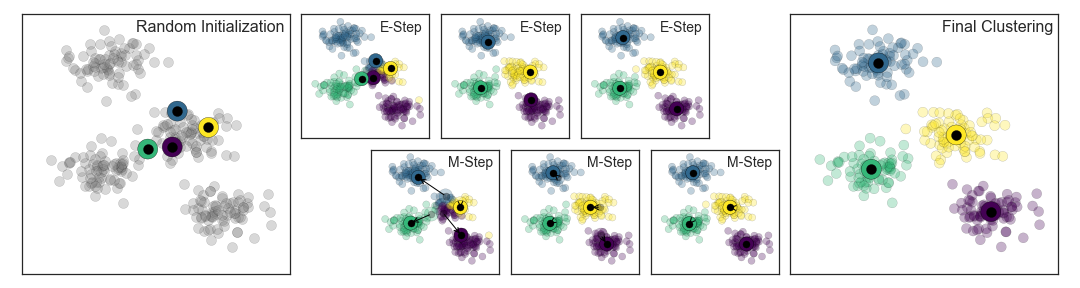

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE). Like this:

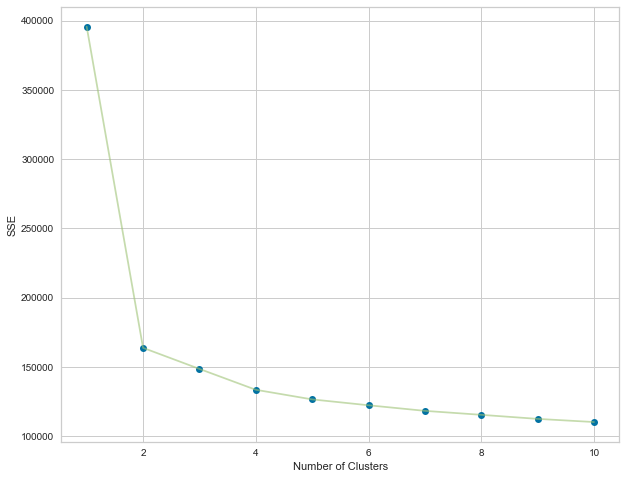

In [51]:
from sklearn.cluster import KMeans

X = data_f.iloc[: , :].values
inertia = []


for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 0 , algorithm='auto') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)
# inertia
# Sum of squared distances of samples to their closest cluster center.



plt.figure(1 , figsize = (10 ,8))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.6)
plt.xlabel('Number of Clusters') , plt.ylabel('SSE')
plt.show()

If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k 
(the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.



S.A. is a way to measure how close each point in a cluster is to the points in its neighboring clusters.
Its a neat way to find out the optimum value for k during k-means clustering.
Silhouette values lies in the range of [-1, 1].

A value of +1 indicates that the sample is far away from its neighboring 
cluster and very close to the cluster its assigned. 

Similarly, value of -1 indicates that the point is close to its neighboring cluster than to the cluster its assigned. 
And, a value of 0 means its at the boundary of the distance between the two cluster.

Value of +1 is idea and -1 is least preferred. Hence, higher the value better is the cluster configuration.

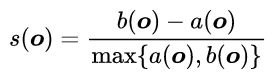

s(o) is the silhouette coefficient of the data point o

a(o) is the average distance between o and all the other data points in the cluster to which o belongs

b(o) is the minimum average distance from o to all clusters to which o does not belong

# STEPS:

# Train a number of K-Means models using different values of K


# Record the average silhouette coefficient during each training

# Plot the silhouette score vs. number of clusters (K) graph

## ---Select the value of K for which silhouette score is the highest

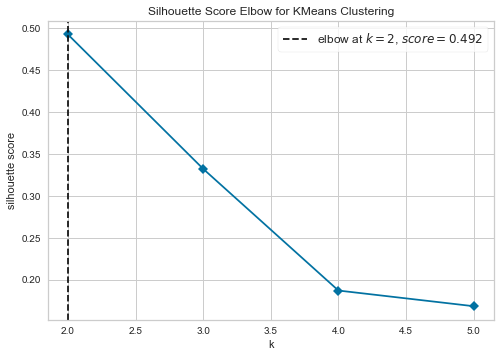

In [52]:

# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()

In [53]:

# IDEAL NUMBER OF CLUSTERS SHOULD BE 2 

# CLUSTERING WITHOUT DIMENSIONALITY REDUCTION

In [54]:
# dataset with all the features
data_o=data_f

In [55]:
algorithm_6 = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 123  , algorithm='auto') )
algorithm_4 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 123  , algorithm='auto') )
algorithm_2 = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 123  , algorithm='auto') )

In [56]:
kmc_6=algorithm_6.fit(data_o)
kmc_4=algorithm_4.fit(data_o)
kmc_2=algorithm_2.fit(data_o)
data_o['cluster_4'] = kmc_4.labels_
data_o['cluster_6'] = kmc_6.labels_
data_o['cluster_2'] = kmc_2.labels_

In [57]:
data_f.cluster_6.value_counts()

2    1819
1    1435
3    1351
0    1301
4     936
5     510
Name: cluster_6, dtype: int64

In [58]:
data_f.cluster_4.value_counts()

3    2601
0    1970
1    1452
2    1329
Name: cluster_4, dtype: int64

In [59]:
data_f.cluster_2.value_counts()

0    4056
1    3296
Name: cluster_2, dtype: int64

In [60]:
u_labels_4 = np.unique(data_o.cluster_4)
u_labels_6 = np.unique(data_o.cluster_6)
u_labels_2 = np.unique(data_o.cluster_2)

## PLOTTING THE KM 2 clusters

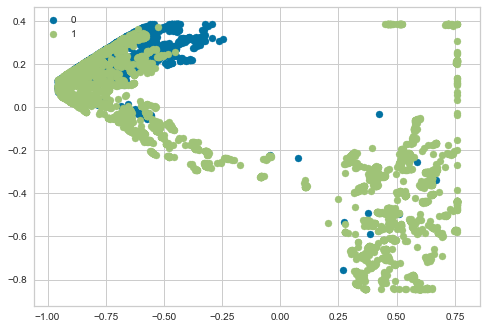

In [61]:


label=algorithm_2.fit_predict(data_o)
# centroids = algorithm_4.cluster_centers_ 
#plotting the results:
 
for i in u_labels_2:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label= i)
# plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [62]:
# INFERENCE : the clusters are not very clearly separated, although they were expected to be, can this be due to the curse of the dimensionality?

## PLOTTING KM4 Clusters

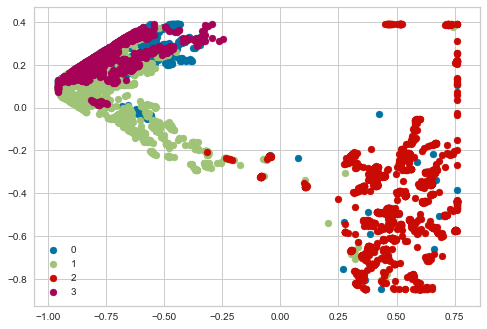

In [63]:
label=algorithm_4.fit_predict(data_o)
# centroids = algorithm_4.cluster_centers_ 
#plotting the results:
 
for i in u_labels_4:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label= i)
# plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [64]:
# INFERENCE based on assumption: this maybe just doing fine in segregating the walking activities( blue, green, purple) as one and other 3(non-moving activities- red), but keeping that as an assumption there are few 1(orange) mixed with red as well

## PLOTTING KM6 clusters

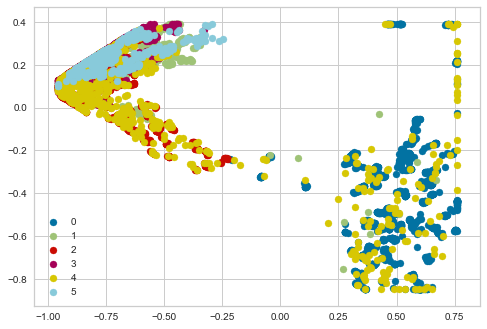

In [65]:
label=algorithm_6.fit_predict(data_o)
# centroids = algorithm_4.cluster_centers_ 
#plotting the results:
 
for i in u_labels_6:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label= i)
# plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [66]:
# INFERENCE: if this would have worked, we would have got very clearly separated clusters, but this looks pretty messed up( wait? we did clip our quantiles)

In [67]:
#CHECKING FOR CORRELATION

In [68]:
correlated_values = data_f.corr()
correlated_values = (correlated_values.stack().to_frame().reset_index()
                    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlations'}))
correlated_values['abs_correlation'] = correlated_values.Correlations.abs()
correlated_values.head()
#Picking most correlated features
train_fields = correlated_values.sort_values('Correlations', ascending = False).query('abs_correlation>0.8')


In [69]:
train_fields.tail(20)

,Feature_1,Feature_2,Correlations,abs_correlation
313021,tGravityAccminY,angleYgravityMean,-0.991153,0.991153
1119,angleYgravityMean,tGravityAccminY,-0.991153,0.991153
309637,tGravityAccmaxY,angleYgravityMean,-0.991881,0.991881
1113,angleYgravityMean,tGravityAccmaxY,-0.991881,0.991881
296626,tGravityAccarCoeffY1,tGravityAccarCoeffY2,-0.991972,0.991972
297189,tGravityAccarCoeffY2,tGravityAccarCoeffY1,-0.991972,0.991972
1684,angleZgravityMean,tGravityAccminZ,-0.992441,0.992441
313586,tGravityAccminZ,angleZgravityMean,-0.992441,0.992441
1678,angleZgravityMean,tGravityAccmaxZ,-0.994093,0.994093
310202,tGravityAccmaxZ,angleZgravityMean,-0.994093,0.994093


SEEMS LIKE WE HAVE MULTICOLLINIERITY AS WELL
Overfitting needs to be avoided right?

# What can be a feasible option which helps us reduce the chances of multicolliniearity, Avoid overfitting and give better segementation without losing the information from each of the variable?

## DIMENSIONALITY REDUCTION

Any algorithm that relies on a distance metric in a high-dimensional space will suffer from the curse of dimensionality. In effect, all the observations are going to appear "far" from one another, with relatively little variation in the distance measurement, making the clustering very weak. It will be way better off selecting informative features, and using only those to construct your distance metric for k-means. 

In [71]:
# Principal Component Analysis is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set

## these principal components are a culmination of information from every feature in the original dataset.
## As a result, they are not interpretable. However, we can approximate back the original 
## features using eigenvalues information even though the result is not exactly the same as the original dataset.

In [75]:
pca = PCA(n_components=0.90, random_state=123).fit(data_f)
X_pca = pca.transform(data_f)

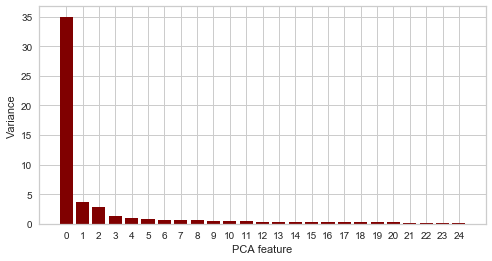

In [76]:
#check for optimal number of components
pca = PCA(random_state=123)
pca.fit(X_pca)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:25], pca.explained_variance_[:25], color='maroon')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:25])

plt.show()

In [77]:
X_pca.shape

(7352, 30)

In [78]:
# there are 30 main components out of 561 which explains 90% of the variance in the data
# there are 10 components which can explain 81%

In [79]:
# Variance explained by first two components is 68%
# rest 8 PCs explain 13%
from sklearn import decomposition
pca = decomposition.PCA(n_components=10, random_state = 123)
X_pca = pca.fit_transform(X)
s = 0 
for i, component in enumerate(pca.components_):
    s += 100 * pca.explained_variance_ratio_[i]
    print("{} component: {}% of initial variance".format(i + 1, 
                                                         round(100 * pca.explained_variance_ratio_[i], 2)))
print(s)

1 component: 63.65% of initial variance
2 component: 4.82% of initial variance
3 component: 4.22% of initial variance
4 component: 1.74% of initial variance
5 component: 1.62% of initial variance
6 component: 1.27% of initial variance
7 component: 1.18% of initial variance
8 component: 1.05% of initial variance
9 component: 0.95% of initial variance
10 component: 0.87% of initial variance
81.36131859421812


In [80]:
X=data_f.values
pca = PCA(n_components=10)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)
#561 Columns present in X are now represented by 10 P components present in reduced_X


In [123]:
df2= pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.463388,-1.755792,-0.230462,-0.123594,1.323489,1.132422,0.284533,0.080216,1.066974,0.003256
1,-5.621566,-1.835395,-0.750938,-0.532837,0.615660,0.506797,-1.228470,0.753609,0.284639,0.954325
2,-5.569058,-1.845246,-1.141515,-0.684794,0.160954,0.604356,-0.044076,0.087460,0.211335,0.144466
3,-5.769990,-1.629561,-1.633743,-0.451796,0.457100,-0.318735,-1.044238,0.855236,-0.127625,-0.446055
4,-5.849347,-1.597432,-1.911464,-0.551737,0.205021,0.039566,-0.504289,0.278811,-0.052553,-0.635349


In [124]:
df2.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
count,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03
mean,-2.423403e-16,-4.303775e-17,2.814820e-17,-2.822371e-17,-3.107779e-17,-1.275126e-16,6.952485e-17,-7.124636e-17,6.880000e-17,1.094820e-17
std,5.916554e+00,1.934142e+00,1.699403e+00,1.145046e+00,9.988726e-01,9.121686e-01,8.142569e-01,7.753825e-01,7.531220e-01,6.976770e-01
min,-6.694143e+00,-3.859988e+00,-4.672821e+00,-2.468278e+00,-3.377910e+00,-3.332381e+00,-2.389521e+00,-2.459688e+00,-2.633466e+00,-2.054040e+00
25%,-5.661932e+00,-1.424569e+00,-1.360569e+00,-7.216164e-01,-6.758550e-01,-5.994819e-01,-6.258626e-01,-5.502182e-01,-5.089431e-01,-4.771542e-01
50%,-3.221544e+00,-2.529032e-01,-2.138092e-01,-2.356595e-01,-7.548921e-02,1.758501e-02,-3.218109e-02,-1.132378e-02,-6.683807e-02,1.873130e-04
75%,5.796785e+00,1.225663e+00,1.320596e+00,4.940442e-01,5.713031e-01,5.459064e-01,5.836774e-01,5.727731e-01,4.725370e-01,4.936414e-01
max,1.356705e+01,4.012693e+00,6.452004e+00,5.265540e+00,3.536853e+00,4.166859e+00,2.732716e+00,2.956447e+00,2.960082e+00,2.172393e+00


In [84]:
# from sklearn.preprocessing import StandardScaler
# pc=StandardScaler()
# train_num_scaled=pc.fit_transform(df2)

In [125]:
# scaled_PC=pd.DataFrame(train_num_scaled,columns=df2.columns)
# scaled_PC.head()

In [126]:
# scaled_PC.describe()

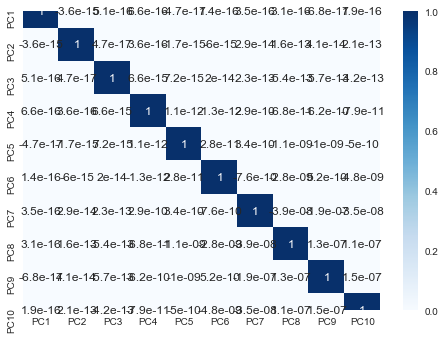

In [127]:
corr=df2.corr()
sns.heatmap(corr,cmap="Blues", annot=True)

In [90]:
# every principal component is perpendicular to each other and hence they don’t correlate with one another 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002585D4983C8>,
      dtype=object)

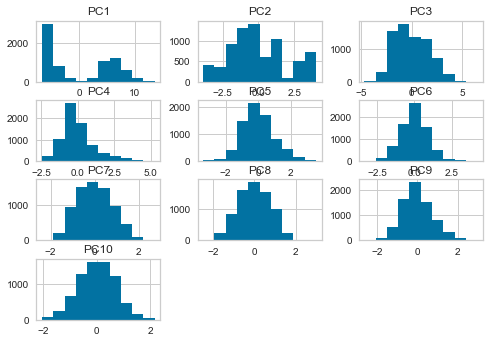

In [128]:
#checking the distribution of the PCs
df2.hist()

plotting the Clusters using the components

In [130]:
kmc_6=algorithm_6.fit(df2)
kmc_4=algorithm_4.fit(df2)
kmc_2=algorithm_2.fit(df2)
data_o['cluster_4'] = kmc_4.labels_
data_o['cluster_6'] = kmc_6.labels_
data_o['cluster_2'] = kmc_2.labels_

In [131]:
u_labels_4 = np.unique(data_o.cluster_4)
u_labels_6 = np.unique(data_o.cluster_6)
u_labels_2 = np.unique(data_o.cluster_2)

In [100]:
# FOR THE SAKE OF EXPLORING HOW WELL THE CLUSTERS ARE DEFINED, WE CAN PICK TWO OF THE MAIN PCs and plot them 


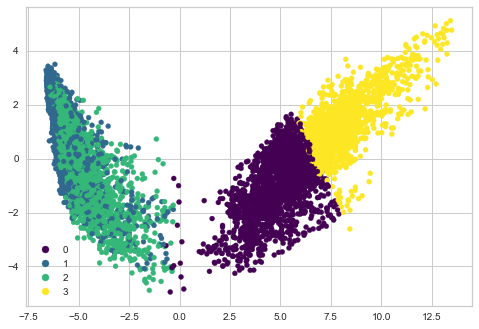

In [132]:
scatter=plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmc_4.labels_, s=25,  
            cmap='viridis');
classes = ['0', '1', '2','3']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [101]:
# all the 4 clusters appear to be  separated, except 1 and 2 are closely related

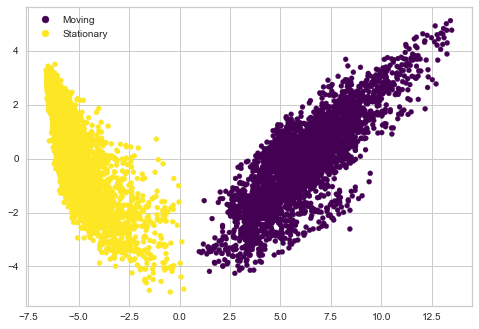

In [137]:
scatter=plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmc_2.labels_, s=25,  
            cmap='viridis');
classes = ['Moving', 'Stationary']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [97]:
# both are clusters are separated pretty clearly

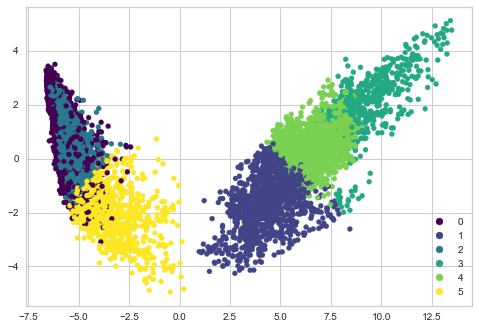

In [134]:
scatter=plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmc_6.labels_, s=25,  
            cmap='viridis');
classes = ['0', '1', '2','3','4','5']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [135]:
data_o['SUBJECT']=ID['subject']

In [145]:
df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.463388,-1.755792,-0.230462,-0.123594,1.323489,1.132422,0.284533,0.080216,1.066974,0.003256
1,-5.621566,-1.835395,-0.750938,-0.532837,0.615660,0.506797,-1.228470,0.753609,0.284639,0.954325
2,-5.569058,-1.845246,-1.141515,-0.684794,0.160954,0.604356,-0.044076,0.087460,0.211335,0.144466
3,-5.769990,-1.629561,-1.633743,-0.451796,0.457100,-0.318735,-1.044238,0.855236,-0.127625,-0.446055
4,-5.849347,-1.597432,-1.911464,-0.551737,0.205021,0.039566,-0.504289,0.278811,-0.052553,-0.635349
...,...,...,...,...,...,...,...,...,...,...
7347,6.485990,-0.388713,2.749933,0.275983,-0.575742,1.485350,-0.980901,-0.487265,-1.238851,0.138857
7348,6.022088,-0.326648,2.615824,0.351750,-0.658872,1.845305,-0.926277,-0.426963,-0.586945,0.988940
7349,6.082659,-0.452061,3.234010,0.657840,-0.257762,1.933967,-1.296723,0.064479,0.174237,-0.929832
7350,5.649766,-0.499949,3.524109,0.462284,-0.288295,1.766016,-1.552616,-0.228019,-0.223216,-1.292654


In [148]:
FINAL=pd.concat([data_o, df2],axis=1)

In [136]:
data_o.head(7)


,angleXgravityMean,angleYgravityMean,angleZgravityMean,angletBodyAccJerkMeangravityMean,angletBodyAccMeangravity,angletBodyGyroJerkMeangravityMean,angletBodyGyroMeangravityMean,fBodyAccJerkbandsEnergy116,fBodyAccJerkbandsEnergy116,fBodyAccJerkbandsEnergy116,...,tGravityAccminY,tGravityAccminZ,tGravityAccsma,tGravityAccstdX,tGravityAccstdY,tGravityAccstdZ,cluster_4,cluster_6,cluster_2,SUBJECT
0,-0.841247,0.179941,-0.058627,0.030400,-0.112754,-0.018446,-0.464761,-0.999982,-0.999900,-0.999620,...,-0.123213,0.056483,-0.375426,-0.985250,-0.981708,-0.877625,2,2,1,1
1,-0.844788,0.180289,-0.054317,-0.007435,0.053477,0.703511,-0.732626,-0.999987,-0.999817,-0.999852,...,-0.114893,0.102764,-0.383430,-0.997411,-0.989447,-0.931639,2,2,1,1
2,-0.848933,0.180637,-0.049118,0.177899,-0.118559,0.808529,0.100699,-0.999963,-0.999732,-0.999803,...,-0.114893,0.102764,-0.401602,-0.999450,-0.992866,-0.992917,2,2,1,1
3,-0.848649,0.181935,-0.047663,-0.012892,-0.036788,-0.485366,0.640011,-0.999978,-0.999798,-0.999756,...,-0.121336,0.095753,-0.400278,-0.996646,-0.981393,-0.978476,2,2,1,1
4,-0.847865,0.185151,-0.043892,0.122542,0.123320,-0.615971,0.693578,-0.999988,-0.999878,-0.999853,...,-0.121834,0.094059,-0.400477,-0.998429,-0.988098,-0.978745,2,2,1,1
5,-0.849632,0.184823,-0.042126,-0.143439,0.082632,-0.368224,0.275041,-0.999987,-0.999931,-0.999808,...,-0.121834,0.094059,-0.409359,-0.998979,-0.986754,-0.997306,2,2,1,1
6,-0.852150,0.182170,-0.043010,-0.230622,-0.212754,-0.189512,0.014637,-0.999983,-0.999821,-0.999863,...,-0.120092,0.094085,-0.416761,-0.999332,-0.988575,-0.992016,2,2,1,1


In [149]:
FINAL.to_csv("D:/DS/Human Activity Recognition Using Smartphones/DATA/dataset/OUTPUT_from_python.csv")

In [152]:
size=pd.concat([pd.Series(FINAL.cluster_4.size), pd.Series.sort_index(FINAL.cluster_4.value_counts()), pd.Series.sort_index(FINAL.cluster_6.value_counts()),
])
Seg_count=pd.DataFrame(size, columns=['Seg_count'])
Seg_Perc = pd.DataFrame(size/FINAL.cluster_4.size, columns=['Seg_Pct'])
Seg_count.T

,0,0,1,2,3,0,1,2,3,4,5
Seg_count,7352,1979,1404,2640,1329,1301,1351,1819,510,1435,936


In [153]:
Seg_Perc.T

,0,0,1,2,3,0,1,2,3,4,5
Seg_Pct,1.0,0.269178,0.190968,0.359086,0.180767,0.176959,0.18376,0.247416,0.069369,0.195185,0.127312


In [154]:
# mean for each variable for each cluster to look for the distribution of data
Profiling_output = pd.concat([FINAL.apply(lambda x: x.mean()).T, FINAL.groupby('cluster_4').apply(lambda x: x.mean()).T,FINAL.groupby('cluster_6').apply(lambda x: x.mean()).T], axis=1)
Profiling_output_final=pd.concat([Seg_count.T, Seg_Perc.T, Profiling_output], axis=0)
Profiling_output_final.columns = ['Overall','KM4_1', 'KM4_2', 'KM4_3', 'KM4_4','KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6']

In [155]:
pd.set_option('display.max_rows',600)
Profiling_output_final

,Overall,KM4_1,KM4_2,KM4_3,KM4_4,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5,KM6_6
Seg_count,7.352000e+03,1979.000000,1404.000000,2640.000000,1329.000000,1301.000000,1351.000000,1819.000000,510.000000,1435.000000,936.000000
Seg_Pct,1.000000e+00,0.269178,0.190968,0.359086,0.180767,0.176959,0.183760,0.247416,0.069369,0.195185,0.127312
angleXgravityMean,-4.902567e-01,-0.698402,0.494128,-0.731434,-0.741158,0.492249,-0.681411,-0.746956,-0.714589,-0.757292,-0.549498
angleYgravityMean,5.900627e-02,0.230940,-0.436431,0.107924,0.229204,-0.436694,0.235835,0.106804,0.230995,0.229436,0.044887
angleZgravityMean,-5.842469e-02,0.076052,-0.465910,-0.016553,0.088632,-0.463909,0.083765,-0.020437,0.138352,0.062050,-0.065797
angletBodyAccJerkMeangravityMean,2.230413e-03,-0.013244,0.016272,0.006865,0.001234,0.011972,-0.000749,0.007375,-0.002972,-0.017594,0.016219
angletBodyAccMeangravity,8.638441e-03,0.037111,0.010686,0.010698,-0.040015,0.004941,0.047189,0.007130,-0.050512,-0.012807,0.026174
angletBodyGyroJerkMeangravityMean,-6.003132e-03,0.019152,0.005717,-0.005336,-0.057168,-0.005043,0.031232,0.005238,-0.076843,-0.029314,-0.008591
angletBodyGyroMeangravityMean,8.736833e-03,-0.038308,0.019441,0.008507,0.067939,0.030124,-0.060401,-0.013153,0.120625,0.025018,0.035416
fBodyAccJerkbandsEnergy116,-8.701308e-01,-0.805936,-0.999739,-0.999725,-0.571368,-0.999865,-0.835476,-0.999940,-0.517150,-0.661926,-0.999089


In [156]:
Profiling_output_final.to_csv("D:/DS/Human Activity Recognition Using Smartphones/DATA/dataset/PROFILE.csv")